<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Fashion_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fashion_products.csv')

# Basic Data Exploration

In [47]:
df.head(6)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [ ]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Data Cleaning

In [ ]:
df.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [ ]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# Data Visualization


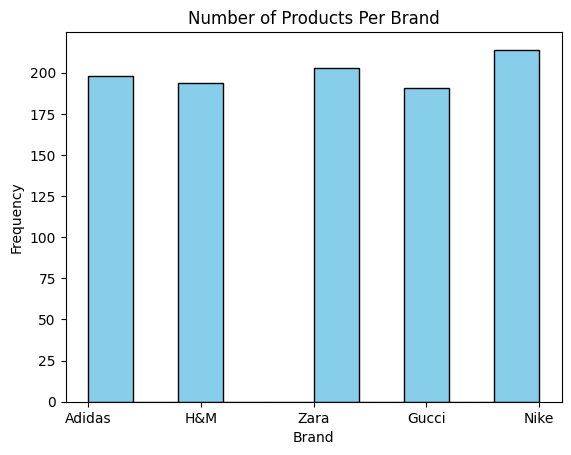

In [ ]:

# Create a histogram
plt.hist(df['Brand'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Number of Products Per Brand')
plt.show()


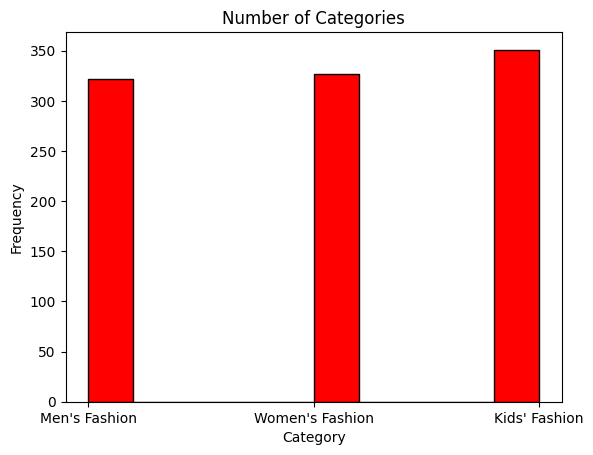

In [ ]:
# Create a histogram
plt.hist(df['Category'], bins=10, color='red', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Number of Categories')
plt.show()

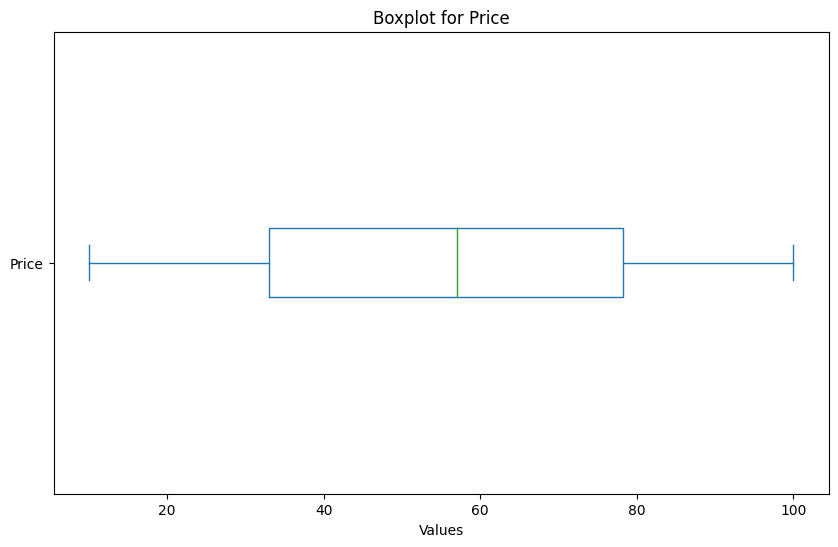

In [ ]:
plt.figure(figsize=(10, 6))

df['Price'].plot(kind='box', vert=False)
plt.title('Boxplot for Price')
plt.xlabel('Values')
plt.show()


In [ ]:
df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

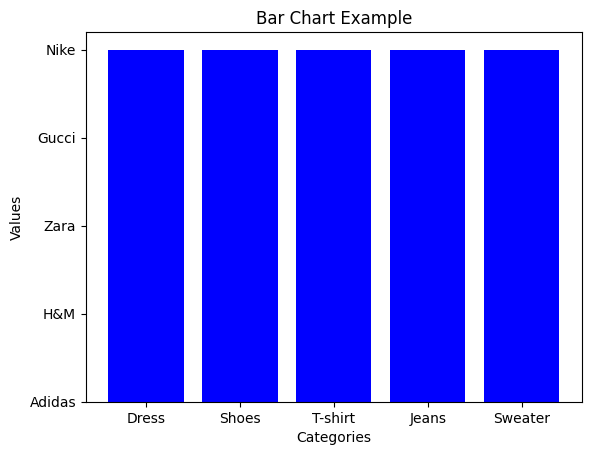

In [ ]:


# Create a bar chart
plt.bar(df['Product Name'], df['Brand'], color='blue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Display the bar chart
plt.show()


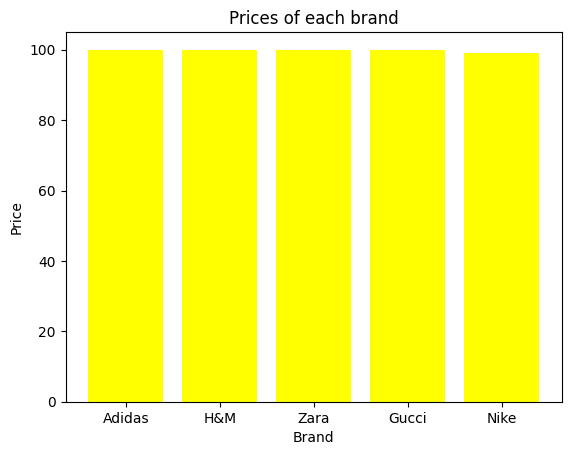

In [ ]:


# Create a bar chart
plt.bar(df['Brand'], df['Price'], color='yellow')

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Prices of each brand')

# Display the bar chart
plt.show()


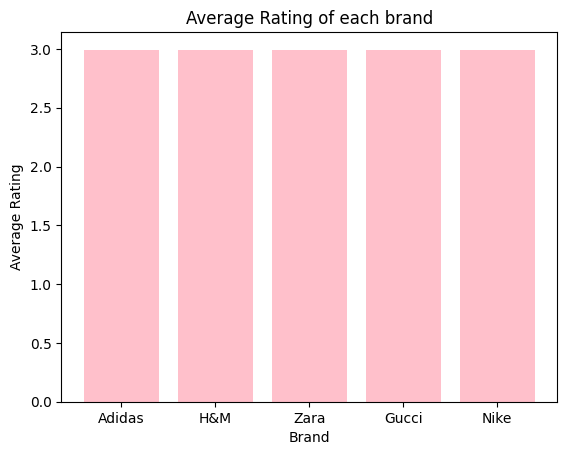

In [ ]:
average_Rating = df['Rating'].mean()

plt.bar(df['Brand'], average_Rating, color='pink')

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating of each brand')

# Display the bar chart
plt.show()




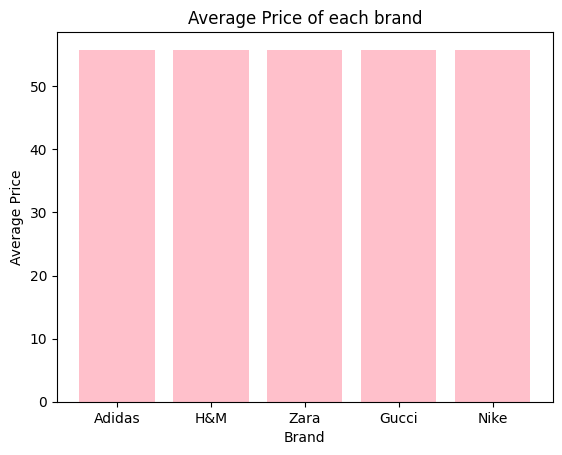

In [ ]:
average_Price = df['Price'].mean()

plt.bar(df['Brand'], average_Price, color='pink')

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price of each brand')

# Display the bar chart
plt.show()




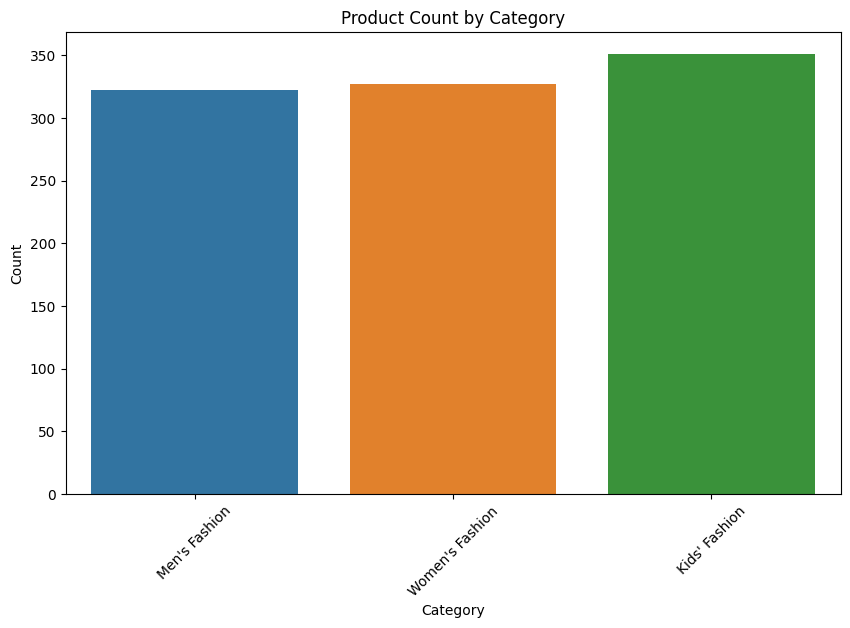

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product Count by Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-32-758fd86fef16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


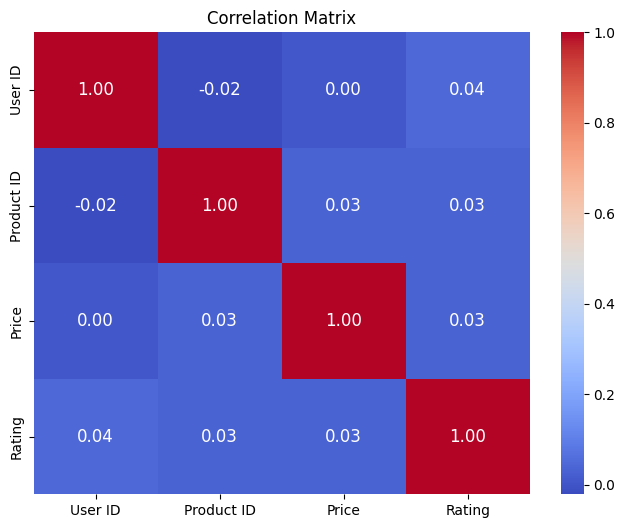

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()


# Content-Based Recommender

In [41]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
# Create a new DataFrame with selected columns
new_df = df[['Product Name', 'Brand', 'Category', 'Price', 'Size']]



In [43]:
combined_Features = new_df['Product Name'] + ' ' + new_df['Brand'] + ' ' + new_df['Category'] + ' ' + new_df['Size']
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_Features)

# Print the TF-IDF matrix (sparse matrix representation)
print(tfidf_matrix.toarray())

[[0.51840079 0.54162176 0.19820711 ... 0.         0.46925361 0.        ]
 [0.         0.         0.29192535 ... 0.61763848 0.         0.        ]
 [0.51906637 0.54231716 0.1984616  ... 0.41989337 0.46985609 0.        ]
 ...
 [0.         0.         0.22411286 ... 0.         0.         0.58059456]
 [0.         0.         0.22971648 ... 0.48602062 0.         0.59511151]
 [0.60685324 0.         0.23202633 ... 0.49090765 0.         0.        ]]


In [44]:

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [50]:



# Function to get top N similar products
def get_top_similar_products(product_idx, cosine_sim, top_n=3):
    sim_scores = list(enumerate(cosine_sim[product_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_products = sim_scores[1:top_n + 1]
    return top_similar_products

# Example: Get top 3 similar products for Product C (index 2 in the DataFrame)
product_index = 9
top_similar_products = get_top_similar_products(product_index, cosine_sim_matrix)

# Display the top similar products
for idx, score in top_similar_products:
    print(f"Similar Product: {df['Product Name'][idx]}, Similarity Score: {score:.3f}")


Similar Product: T-shirt, Similarity Score: 1.000
Similar Product: T-shirt, Similarity Score: 1.000
Similar Product: T-shirt, Similarity Score: 1.000


# Collaborative Filtering Recommender

In [52]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811658 sha256=6c26da8c169eac57f5a928db9ee337facf25caa202e27e5f829f6a00eddb6ff3
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [55]:
df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [56]:
from surprise import (
    Reader,
    Dataset,
    SVD
)
from surprise.model_selection import train_test_split
from surprise import accuracy

# Select the relevant columns for the recommendation system
selected_columns = ['User ID', 'Product Name', 'Rating']

# Create a Surprise Dataset from the DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[selected_columns], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the model (SVD - Singular Value Decomposition)
model = SVD()

# Train the model on the training set
model.fit(trainset)

# Evaluate the model on the testing set
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 1.1751


In [59]:
user_id = 97
items_to_recommend = df['Product Name'].unique()
items_already_rated = df[df['User ID'] == user_id]['Product Name'].values.tolist()
items_to_predict = list(set(items_to_recommend) - set(items_already_rated))
predictions = [model.predict(user_id, item_id) for item_id in items_to_predict]
top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]
recommended_items = [pred.iid for pred in top_recommendations]

print(f'Top recommendations for User ID {user_id}\n{recommended_items}')

Top recommendations for User ID 97
['Dress', 'Jeans']
